In [1]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

%load_ext autoreload
%autoreload 2

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

[('data/train/4c6e53bd10f2470da96a523f33de5c4a.jpg', 3),
 ('data/train/a3c3578b8be045fd80017296ad7fde2d.jpg', 2),
 ('data/train/6672d5ef39034e58bcde3742e2f916ce.jpg', 2),
 ('data/train/d53883e2684f4886932acd18fc9c1169.jpg', 2),
 ('data/train/4103199132a449d2b64763192ccf9109.jpg', 1)]

In [2]:
model = LeNet(config, overfit_mode=True)
print(model)

LeNet

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         456       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
F6 (Dense)                   (None, 84)          

In [3]:
hist = model.train()

W0707 01:13:37.135698 140299029190464 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/20


W0707 01:13:37.312894 140299029190464 deprecation.py:323] From /home/santiago/anaconda3/envs/CV/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1/1 [==============================] - 2s 2s/step - loss: 1.6391 - accuracy: 0.2000 - val_loss: 1.6064 - val_accuracy: 0.1002
Epoch 2/20
1/1 [==============================] - 1s 725ms/step - loss: 1.5895 - accuracy: 0.2000 - val_loss: 1.6579 - val_accuracy: 0.0474
Epoch 3/20
1/1 [==============================] - 1s 679ms/step - loss: 1.5595 - accuracy: 0.2000 - val_loss: 1.6933 - val_accuracy: 0.0474
Epoch 4/20
1/1 [==============================] - 1s 667ms/step - loss: 1.5353 - accuracy: 0.2000 - val_loss: 1.7095 - val_accuracy: 0.0474
Epoch 5/20
1/1 [==============================] - 1s 632ms/step - loss: 1.5107 - accuracy: 0.2000 - val_loss: 1.7108 - val_accuracy: 0.0492
Epoch 6/20
1/1 [==============================] - 1s 665ms/step - loss: 1.4844 - accuracy: 0.2000 - val_loss: 1.7035 - val_accuracy: 0.0583
Epoch 7/20
1/1 [==============================] - 1s 743ms/step - loss: 1.4566 - accuracy: 0.6000 - val_loss: 1.6927 - val_accuracy: 0.0856
Epoch 8/20
1/1 [==================

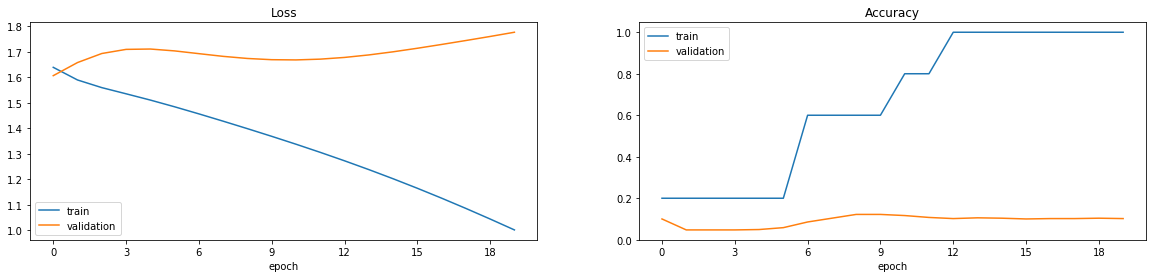

In [4]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

In [15]:
model.evaluate()

train
161/161 [==============================] - 2s 10ms/step - loss: 0.1264 - accuracy: 0.9595
test
34/34 [==============================] - 0s 11ms/step - loss: 1.4132 - accuracy: 0.7146


# Whole data

In [6]:
tf.keras.backend.clear_session()
model = LeNet(config, overfit_mode=False)
print(model)

LeNet

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         456       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
F6 (Dense)                   (None, 84)          

In [7]:
hist = model.train()

W0707 01:13:55.525042 140299029190464 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/100
161/161 [==============================] - 5s 30ms/step - loss: 1.2244 - accuracy: 0.4844 - val_loss: 1.0753 - val_accuracy: 0.5738
Epoch 2/100
161/161 [==============================] - 3s 20ms/step - loss: 1.0415 - accuracy: 0.5848 - val_loss: 0.9535 - val_accuracy: 0.6047
Epoch 3/100
161/161 [==============================] - 4s 24ms/step - loss: 0.9647 - accuracy: 0.6249 - val_loss: 0.9071 - val_accuracy: 0.6430
Epoch 4/100
161/161 [==============================] - 3s 21ms/step - loss: 0.9224 - accuracy: 0.6409 - val_loss: 0.8853 - val_accuracy: 0.6594
Epoch 5/100
161/161 [==============================] - 3s 21ms/step - loss: 0.8920 - accuracy: 0.6564 - val_loss: 0.8771 - val_accuracy: 0.6594
Epoch 6/100
161/161 [==============================] - 3s 20ms/step - loss: 0.8684 - accuracy: 0.6654 - val_loss: 0.8742 - val_accuracy: 0.6667
Epoch 7/100
161/161 [==============================] - 3s 21ms/step - loss: 0.8478 - accuracy: 0.6724 - val_loss: 0.8699 - val_accuracy:

161/161 [==============================] - 4s 22ms/step - loss: 0.3739 - accuracy: 0.8790 - val_loss: 0.8408 - val_accuracy: 0.7304
Epoch 58/100
161/161 [==============================] - 3s 21ms/step - loss: 0.3642 - accuracy: 0.8844 - val_loss: 0.8465 - val_accuracy: 0.7304
Epoch 59/100
161/161 [==============================] - 3s 21ms/step - loss: 0.3543 - accuracy: 0.8883 - val_loss: 0.8528 - val_accuracy: 0.7286
Epoch 60/100
161/161 [==============================] - 4s 26ms/step - loss: 0.3444 - accuracy: 0.8899 - val_loss: 0.8596 - val_accuracy: 0.7286
Epoch 61/100
161/161 [==============================] - 4s 24ms/step - loss: 0.3344 - accuracy: 0.8926 - val_loss: 0.8669 - val_accuracy: 0.7304
Epoch 62/100
161/161 [==============================] - 4s 23ms/step - loss: 0.3245 - accuracy: 0.8977 - val_loss: 0.8748 - val_accuracy: 0.7250
Epoch 63/100
161/161 [==============================] - 4s 24ms/step - loss: 0.3145 - accuracy: 0.9023 - val_loss: 0.8832 - val_accuracy: 0.728

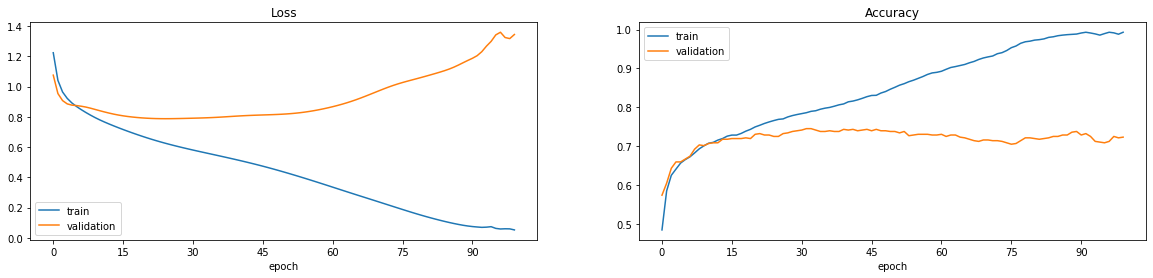

In [8]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

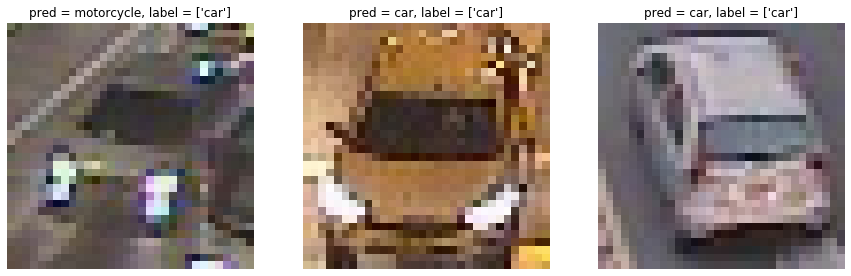

In [9]:
imshow_with_predictions(model, next(iter(model.test_data)), show_label=True, label_map=config['model']['labels'])

In [14]:
model.evaluate()

train
161/161 [==============================] - 2s 11ms/step - loss: 0.1264 - accuracy: 0.9595
test
34/34 [==============================] - 0s 10ms/step - loss: 1.4132 - accuracy: 0.7146


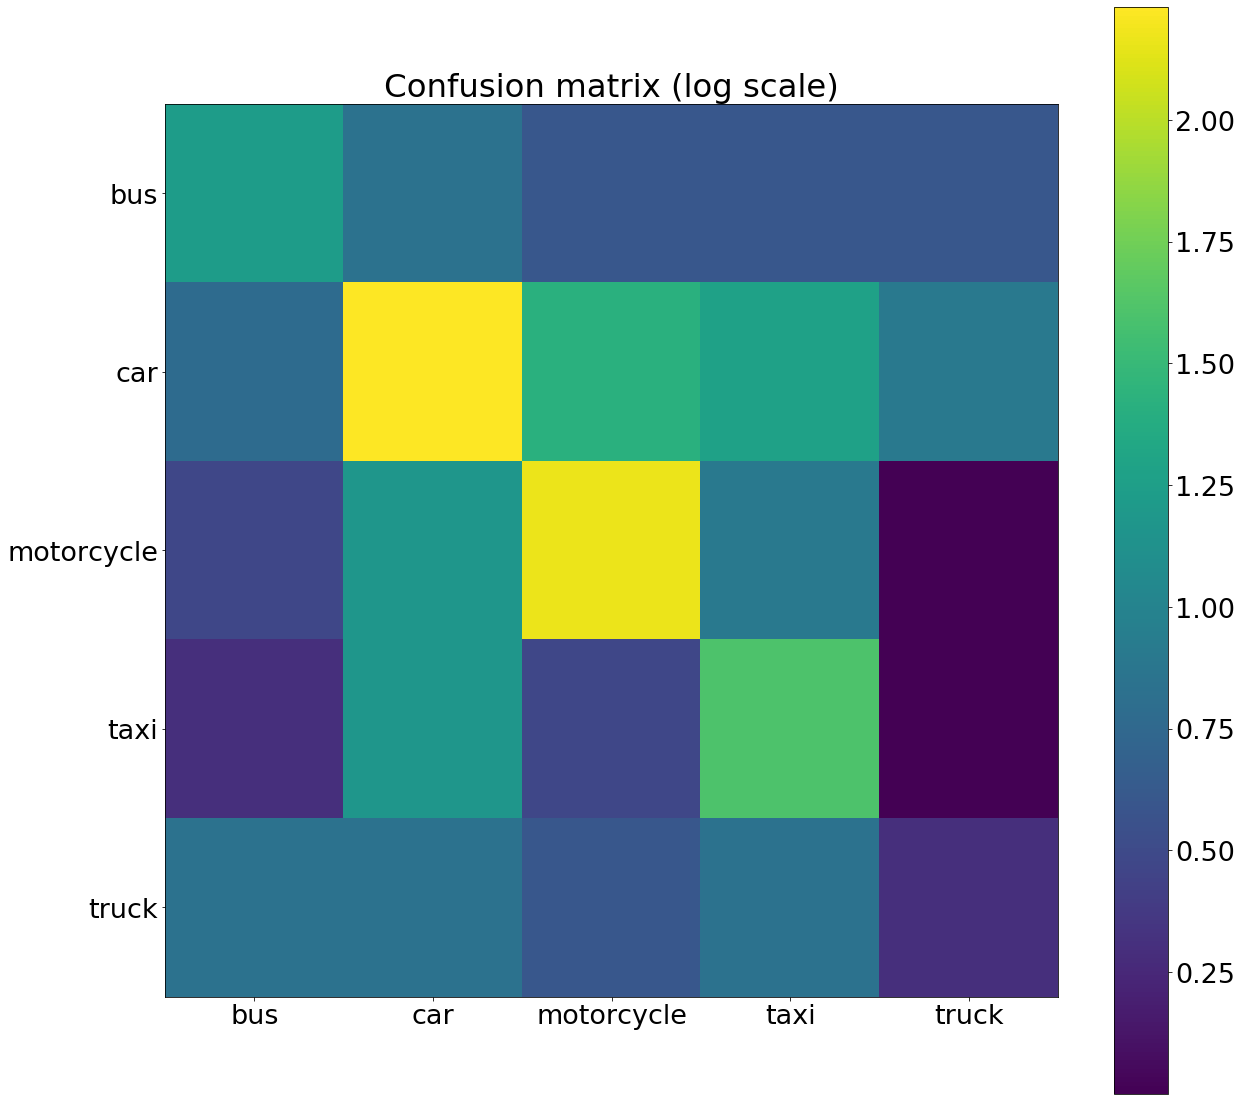

In [13]:
plt.rcParams.update({'font.size': 27})
plt.figure(figsize=(20, 20))
plt.imshow(np.log10(compute_confusion_matrix(model).numpy() + 0.0000001))
plt.yticks(np.arange(5), labels=config['model']['labels'])
plt.xticks(np.arange(5), labels=config['model']['labels'])
plt.title('Confusion matrix (log scale)')
plt.colorbar()